# Solar Radiation Prediction Data Set 

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading Data
dataset = pd.read_csv('SolarPrediction.csv')

In [4]:
dataset.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [5]:
dataset.shape

(32686, 11)

In [6]:
dataset.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


1. Data Preprocessing

In [7]:
#checking dataset for null values
dataset.isnull().sum()
#There are no null values in the dataset

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [9]:
dataset.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [10]:
#As our focus is on model evaluation we are dropping all the object columns
#Columns dropped UNIXTime, Data,Time , TimeSunRise, TimeSunSet
dataset = dataset.iloc[:,3:9]
dataset.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1.21,48,30.46,59,177.39,5.62
1,1.21,48,30.46,58,176.78,3.37
2,1.23,48,30.46,57,158.75,3.37
3,1.21,48,30.46,60,137.71,3.37
4,1.17,48,30.46,62,104.95,5.62


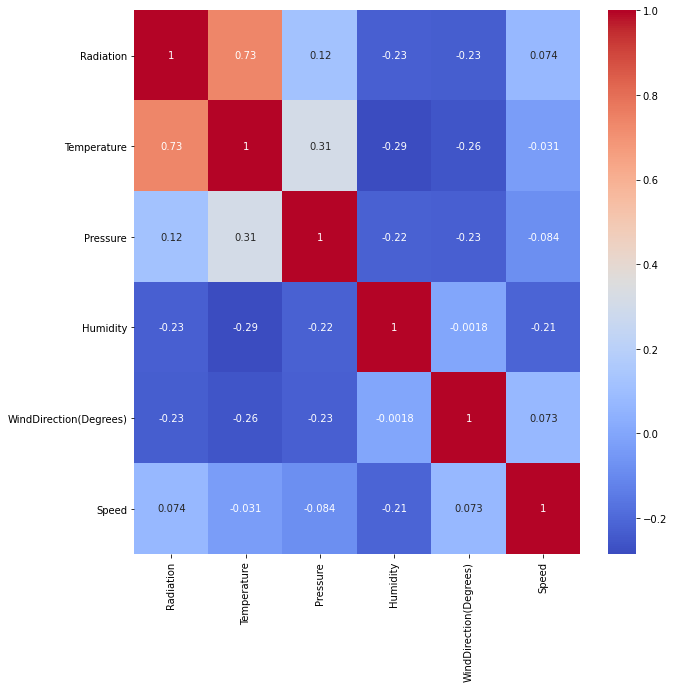

In [11]:
#Plotting HeatMap
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.show()

2. Splitting the data in train and test set

In [12]:
#Assigning the depndent and Independent variable
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

3. Training Multiple Linear regression Model on the training set 

In [14]:
#Building model with statsmodel
import statsmodels.api as sm
model=sm.OLS(y_train, X_train).fit()

In [16]:
y_pred= model.predict(X_test)

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Radiation   R-squared (uncentered):                   0.689
Model:                            OLS   Adj. R-squared (uncentered):              0.689
Method:                 Least Squares   F-statistic:                          1.157e+04
Date:                Tue, 13 Apr 2021   Prob (F-statistic):                        0.00
Time:                        13:22:14   Log-Likelihood:                     -1.7701e+05
No. Observations:               26148   AIC:                                  3.540e+05
Df Residuals:                   26143   BIC:                                  3.541e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Temperature               37.2430      0.229    162.563      0.000      36.794      37.692
Pressure                 -56.7248      0.486   -116.703      0.000     -57.678     -55.772
Humidity                   0.0221      0.054      0.412      0.680      -0.083       0.128
WindDirection(Degrees)    -0.1829      0.016    -11.255      0.000      -0.215      -0.151
Speed                      8.7366      0.384     22.756      0.000       7.984       9.489
==============================================================================
Omnibus:                     2000.267   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2678.024
Skew:                           0.667   Prob(JB):                         0.00
Kurtosis:                       3.825   Cond. No.                         78.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Measuring RMSE
from sklearn import metrics
import numpy as np
rmse = np.sqrt(metrics.mean_squared_error(y_pred,y_test))
print("Root mean square error is : ", rmse)

Root mean square error is :  212.2738548256435


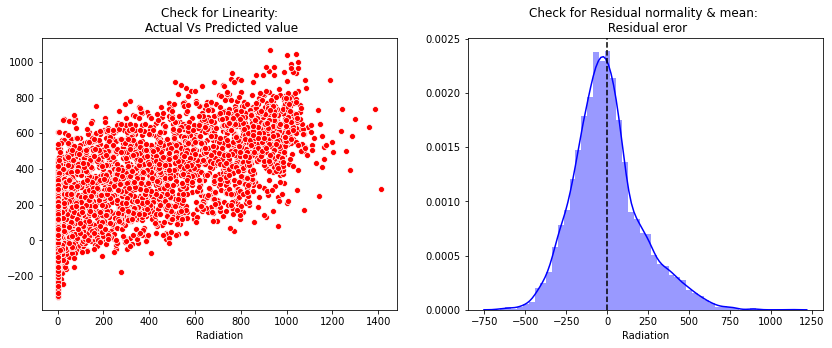

In [37]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,regressor_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - regressor_pred),ax=ax,color='b')
ax.axvline((y_test - regressor_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');